Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


In [ ]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv('movies.csv',delim_whitespace = '')


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'overview', 'production_companies', 'original_title', 'title_y'] from the data set as they will not be used in the analysis.

In [ ]:
# code here
# cleaning the data and checking which are the redundant or unnecessary cols
import pandas as pd
movies_df = pd.read_csv('movies.csv',delim_whitespace = '')

delete_column_list = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 
                'overview', 'production_companies', 'original_title', 'title']

movies_df = movies_df.drop(delete_column_list, axis=1)
movies_df.head()

#### Remove any duplicate rows

In [ ]:

#  dropping the duplicate rows
print(movies_df.shape)
movies_df = movies_df.drop_duplicates(keep='first')
print(movies_df.shape)

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [ ]:
# Code here
import numpy as np
# replacing all the zeros from revenue and budget cols.

columns = ['budget', 'revenue']
movies_df[columns] = movies_df[columns].replace(0, np.nan)

# dropping all the rows
movies_df.dropna(subset = columns, inplace=True)
movies_df.shape

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [ ]:


# Change the release_date column to DateTime column

movies_df.release_date = pd.to_datetime(movies_df['release_date'])
#Extracting the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df.head()

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [ ]:
# code here
# replacing all the zeros from revenue and budget cols.

columns = ['budget', 'revenue']
movies_df[columns] = movies_df[columns].replace(0, np.nan)

# dropping all the rows
movies_df.dropna(subset = columns, inplace=True)
movies_df.shape

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [ ]:

# as there are columns which are in json format, i am flattening these json data into easily interpretable lists

def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [ ]:
# Code here
# finding out the most expensive movies and looking at the budget set for them which is an expense.

expensive_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
expensive_movies_df

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [ ]:
# code here
# finding the most profitable movies

movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
cols = ['budget',
         'profit',
         'revenue',
         'genres',
         'id',
         'popularity',
         'production_countries',
        'release_date',
        'release_year',
         'runtime',
         'spoken_languages',
         'vote_average',
         'vote_count']
movies_df = movies_df[cols]
movies_df.sort_values(by = ['budget'], ascending=False).head()



#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [ ]:
# Code here
# movies rated above 7 
movies_df[movies_df['vote_average'] >= 7.0]



#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [ ]:
# Code here
max_profit_yr = movies_df.groupby('release_year')['profit'].sum()

#figuring the size 
plt.figure(figsize=(10,8), dpi = 100)

#title of the line plot
plt.title('Profits earned by movies Vs Year of their release.')
#x-axis
plt.xlabel('Release Year of Movies in the Movies.csv', fontsize = 11)
#y-axis
plt.ylabel('Profits earned by Moviesin the Movies.csv', fontsize = 11)


#plotting the graph 
plt.plot(max_profit_yr)

#presenting line plot
plt.show()


# max profitable year from movies.csv
max_profit_yr.idxmax()

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [ ]:
 # Code here
 #reference https://towardsdatascience.com/hitchhikers-guide-to-exploratory-data-analysis-part-2-36ab72201e1d
#finding the profit $60M or more
profit = movies_df[movies_df['profit'] >= 40000000]

#reindexing new data
profit.idx = range(len(profit))


# formatting the data in the genres columns.
movies_df['genres']= movies_df['genres'].str.strip('[]').str.replace(' ','').str.replace("'","")
movies_df['genres']= movies_df['genres'].str.split(',')
movies_df.head()

plt.subplots(figsize=(10,8))
lst=[]

#  collecting all the genres of all profitable movies
for i in profit['genres']:
    lst.extend(i)

    
count_serie = pd.Series(lst).value_counts()[:10].sort_values(ascending=True)

count_serie.plot(kind='bar')


In [ ]:
#### Generate three different interesting visualisations with a data story.









# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)

In [27]:
#### load the automobile dataset and create their dataframes
import pandas as pd
import matplotlib.pyplot as plt
automobile_df = pd.read_csv('automobile.txt')

automobile_df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# MISSING DATA

In [28]:
automobile_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [132]:
autom_data['num-of-doors'] = autom_data['num-of-doors'].replace('?','0')
autom_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [130]:
#calculating the sum of fields that contain replacemts
autom_data.replace('?',np.NAN).isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [121]:
# calculating the total number of missing values and '?'
print('=',autom_data.replace('?',np.NAN).isnull().sum().sum())

= 8


In [120]:
# Find out number of records having '?' value for normalized losses
print('=',automobile_df['normalized-losses'].loc[automobile_df['normalized-losses'] == '?'].count())

= 0


In [31]:
# Return a new Data Frame with no empty cells
automobile_df = automobile_df.dropna()
automobile_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,22470


In [123]:
autom_data.replace('?',np.NAN).isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [129]:
# Replace the non-numeric value to null and conver the datatype
autom_data['bore'] = pd.to_numeric(autom_data['bore'],errors='coerce')
autom_data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [122]:
#replacing the '?' with numeric value
autom_data.replace('?',np.NAN)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [34]:
# List out the values which are not numeric
automobile_df['price'].loc[automobile_df['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [35]:
#Setting the missing value to mean of price and convert the datatype to integer
price = automobile_df['price'].loc[automobile_df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
automobile_df['price'] = automobile_df['price'].replace('?',pmean).astype(int)
automobile_df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [41]:
print(automobile_df.to_string())


     symboling  normalized-losses           make fuel-type aspiration num-of-doors   body-style drive-wheels engine-location  wheel-base  length  width  height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  stroke  price
0            3                122    alfa-romero       gas        std          two  convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47    2.68  13495
1            3                122    alfa-romero       gas        std          two  convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47    2.68  16500
2            1                122    alfa-romero       gas        std          two    hatchback          rwd           front        94.5   171.2   65.5    52.4         2823        ohcv              six          152        mpfi  2.68    3.47  16500
3       

In [43]:
print(automobile_df.to_string())

     symboling  normalized-losses           make fuel-type aspiration num-of-doors   body-style drive-wheels engine-location  wheel-base  length  width  height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  stroke  price
0            3                122    alfa-romero       gas        std          two  convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47    2.68  13495
1            3                122    alfa-romero       gas        std          two  convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47    2.68  16500
2            1                122    alfa-romero       gas        std          two    hatchback          rwd           front        94.5   171.2   65.5    52.4         2823        ohcv              six          152        mpfi  2.68    3.47  16500
3       

In [44]:
automobile_df.head(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,13207


In [46]:
#checking for the car that has the maximum height
automobile_df = automobile_df.sort_values(by ='height', ascending=False).head(25)
automobile_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,price
28,-1,110,dodge,gas,std,four,wagon,fwd,front,103.3,...,64.6,59.8,2535,ohc,four,122,2bbl,3.34,3.46,8921
123,-1,74,plymouth,gas,std,four,wagon,fwd,front,103.3,...,64.6,59.8,2535,ohc,four,122,2bbl,3.35,3.46,8921
153,0,77,toyota,gas,std,four,wagon,fwd,front,95.7,...,63.6,59.1,2280,ohc,four,92,2bbl,3.05,3.03,6918
154,0,81,toyota,gas,std,four,wagon,4wd,front,95.7,...,63.6,59.1,2290,ohc,four,92,2bbl,3.05,3.03,7898
155,0,91,toyota,gas,std,four,wagon,4wd,front,95.7,...,63.6,59.1,3110,ohc,four,92,2bbl,3.05,3.03,8778
114,0,122,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,68.4,58.7,3485,l,four,152,idi,3.70,3.52,17075
110,0,122,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,68.4,58.7,3430,l,four,152,idi,3.70,3.52,13860
109,0,122,peugot,gas,std,four,wagon,rwd,front,114.2,...,68.4,58.7,3230,l,four,120,mpfi,3.46,3.19,12440
68,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,28248
36,0,78,honda,gas,std,four,wagon,fwd,front,96.5,...,63.9,58.3,2024,ohc,four,92,1bbl,2.92,3.41,7295


In [47]:
#grouping the data by fuel-type
fuel_group = automobile_df.groupby('fuel-type')
fuel_group

In [48]:
# Find out the number of invalid bore
automobile_df['bore'].loc[automobile_df['bore'] == '?'].replace('?','None')


Series([], Name: bore, dtype: float64)

In [50]:
#finding the correlation of the dataset
correlation_automobile = automobile_df.corr()
correlation_automobile 


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,price
symboling,1.000000,0.552241,-0.031400,-0.097617,-0.138059,-0.077798,-0.143193,-0.193921,-0.211373,-0.262540,-0.223372
normalized-losses,0.552241,1.000000,0.431071,0.327170,0.409590,-0.515843,0.320918,0.157520,0.332434,-0.096015,0.120043
wheel-base,-0.031400,0.431071,1.000000,0.944230,0.890815,-0.510324,0.849367,0.744441,0.706024,0.109806,0.713487
length,-0.097617,0.327170,0.944230,1.000000,0.893065,-0.545507,0.897836,0.728169,0.780433,0.039244,0.740595
width,-0.138059,0.409590,0.890815,0.893065,1.000000,-0.734517,0.907152,0.812716,0.715371,0.175898,0.873465
height,-0.077798,-0.515843,-0.510324,-0.545507,-0.734517,1.000000,-0.557527,-0.493500,-0.513244,0.118950,-0.605082
curb-weight,-0.143193,0.320918,0.849367,0.897836,0.907152,-0.557527,1.000000,0.773782,0.725657,0.181694,0.815377
engine-size,-0.193921,0.157520,0.744441,0.728169,0.812716,-0.493500,0.773782,1.000000,0.606992,0.318335,0.922080
bore,-0.211373,0.332434,0.706024,0.780433,0.715371,-0.513244,0.725657,0.606992,1.000000,0.256068,0.530224
stroke,-0.262540,-0.096015,0.109806,0.039244,0.175898,0.118950,0.181694,0.318335,0.256068,1.000000,0.208409


In [52]:
#import libraries
import numpy as np
import pandas as pd

#reading through the automobile.txt dataset
autom_data = pd.read_csv("automobile.txt", delim_whitespace='')
#calling the top 5 records of the dataset
autom_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [64]:
automobile_df = automobile_df.sort_values(by ='height', ascending=False).head(25)
automobile_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,price
28,-1,110,dodge,gas,std,four,wagon,fwd,front,103.3,...,64.6,59.8,2535,ohc,four,122,2bbl,3.34,3.46,8921
123,-1,74,plymouth,gas,std,four,wagon,fwd,front,103.3,...,64.6,59.8,2535,ohc,four,122,2bbl,3.35,3.46,8921
153,0,77,toyota,gas,std,four,wagon,fwd,front,95.7,...,63.6,59.1,2280,ohc,four,92,2bbl,3.05,3.03,6918
154,0,81,toyota,gas,std,four,wagon,4wd,front,95.7,...,63.6,59.1,2290,ohc,four,92,2bbl,3.05,3.03,7898
155,0,91,toyota,gas,std,four,wagon,4wd,front,95.7,...,63.6,59.1,3110,ohc,four,92,2bbl,3.05,3.03,8778
114,0,122,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,68.4,58.7,3485,l,four,152,idi,3.70,3.52,17075
110,0,122,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,68.4,58.7,3430,l,four,152,idi,3.70,3.52,13860
109,0,122,peugot,gas,std,four,wagon,rwd,front,114.2,...,68.4,58.7,3230,l,four,120,mpfi,3.46,3.19,12440
68,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,28248
36,0,78,honda,gas,std,four,wagon,fwd,front,96.5,...,63.9,58.3,2024,ohc,four,92,1bbl,2.92,3.41,7295


# DATA CLEANING

In [124]:
#Cleaning the num-of-doors data
# remove the records which are having the value '?'
automobile_df['num-of-doors'].loc[automobile_df['num-of-doors'] == '?']
automobile_df = automobile_df[automobile_df['num-of-doors'] != '?']
automobile_df['num-of-doors'].loc[automobile_df['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

In [127]:
#Cleaning bore
# Find out the number of invalid value
print(automobile_df['bore'].loc[automobile_df['bore'] == '?'])

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object


In [97]:
#going through the horsepower column where there are no values = '?'
temp = autom_data[autom_data['horsepower']!='?']
normmean = temp['horsepower'].astype(float).mean()
autom_data['horsepower'] = autom_data['horsepower'].replace('?',norm_mean).astype(float)
autom_data['horsepower']

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64

In [99]:
#going through the peak-rpm column where there are no values = '?'
temp = autom_data[autom_data['peak-rpm']!='?']
norm_mean = temp['peak-rpm'].astype(int).mean()
autom_data['peak-rpm'] = autom_data['peak-rpm'].replace('?',norm_mean).astype(float)
autom_data['peak-rpm']

0      5000.0
1      5000.0
2      5000.0
3      5500.0
4      5500.0
        ...  
200    5400.0
201    5300.0
202    5500.0
203    4800.0
204    5400.0
Name: peak-rpm, Length: 205, dtype: float64

In [106]:
#going through the price column where there are no values = '?'
temp = autom_data[autom_data['price']!='?']
norm_mean = temp['price'].astype(int).mean()
autom_data['price'] = autom_data['price'].replace('?',norm_mean).astype(float)
autom_data['price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [100]:
#going through the normalized-losses column where there are no values = '?'
temp = autom_data[autom_data['normalized-losses']!='?']
norm_mean = temp['normalized-losses'].astype(int).mean()
autom_data['normalized-losses'] = autom_data['normalized-losses'].replace('?',norm_mean).astype(float)
autom_data['normalized-losses']

0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [109]:
#Cleaning the stroke
# Replace the non-number value to null and convert the datatype
autom_data['stroke'] = pd.to_numeric(autom_data['stroke'],errors='coerce')
print(autom_data.dtypes)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


In [111]:
# cleaning the data and checking which are the redundant or unnecessary cols

delete_columns = ['compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

automobile_df = autom_data.drop(delete_columns, axis=1)
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,17450.0


# DATA STORIES AND VISUALIZATION

Text(0, 0.5, 'Price of Vehicle')

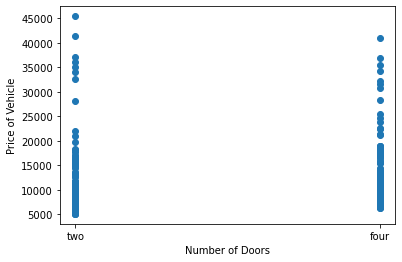

In [96]:
#plotting the scatter plot based on the number of doors of the car and its price
plt.scatter(autom_data['num-of-doors'],autom_data['price'])
plt.xlabel('Number of Doors')
plt.ylabel('Price of Vehicle')

Text(0.5, 1.0, 'Frequency of vehicles by aspiration')

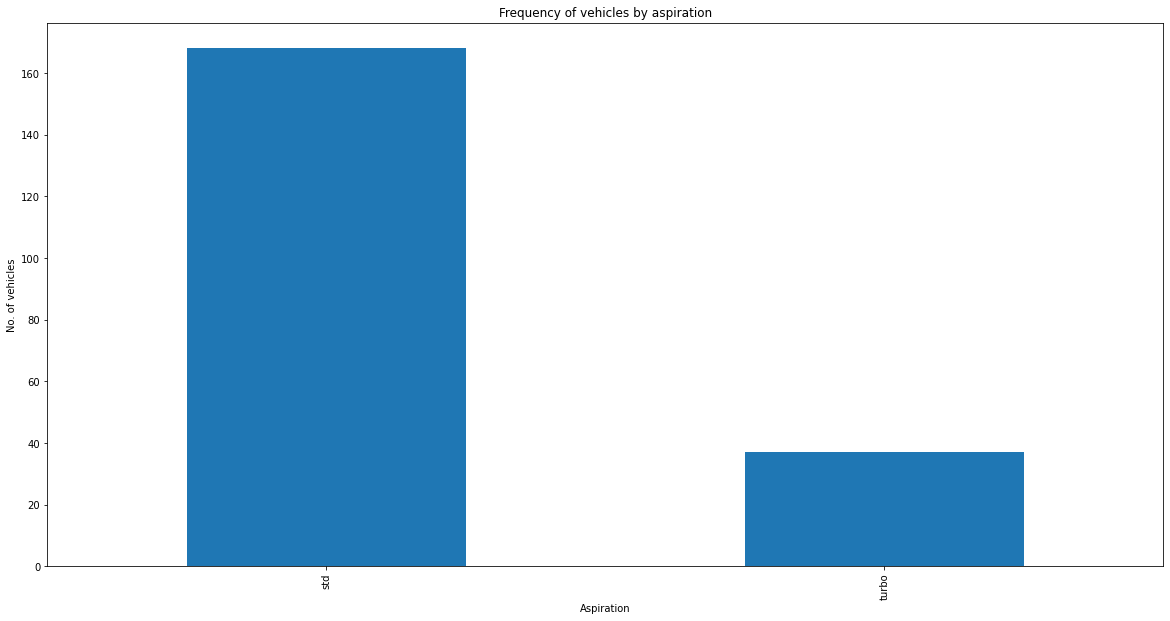

In [95]:
#plotting frequency of vehihles by aspiration
autom_data.aspiration.value_counts().nlargest(5).plot(kind='bar', figsize=(20,10))
plt.xlabel('Aspiration')
plt.ylabel('No. of vehicles')
plt.title("Frequency of vehicles by aspiration")


Text(0, 0.5, 'No. of vehicles')

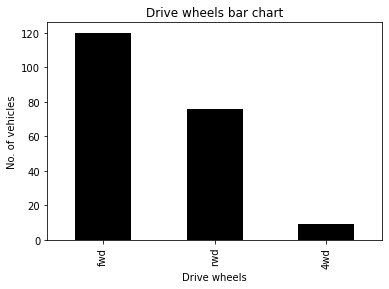

In [94]:
#plotting the bar chart for the drive wheels of the automobile dataset
autom_data['drive-wheels'].value_counts().plot(kind='bar',color='black')
plt.title("Drive wheels bar chart")
plt.xlabel('Drive wheels')
plt.ylabel('No. of vehicles')


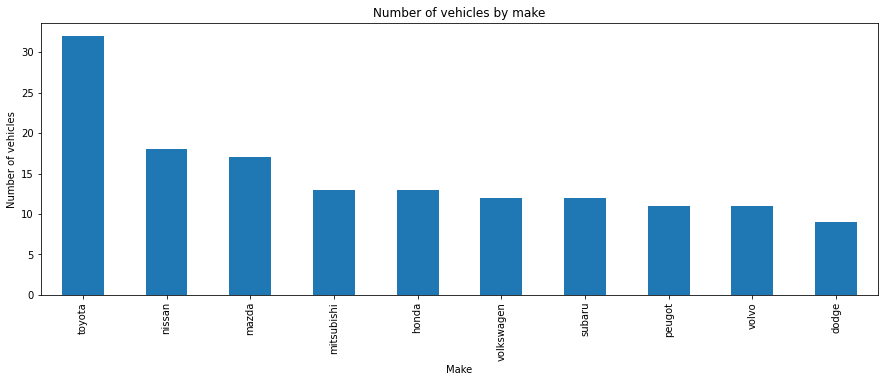

In [93]:
#plotting a make vs no. of vehicles bar graph
autom_data.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

Text(0.5, 0, 'Risk rating')

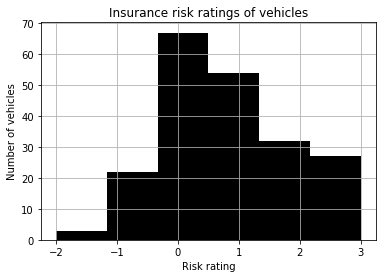

In [92]:
#Insurance risk ratings Histogram
autom_data.symboling.hist(bins=6,color='black');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating')

Text(0.5, 0, 'Normalized losses')

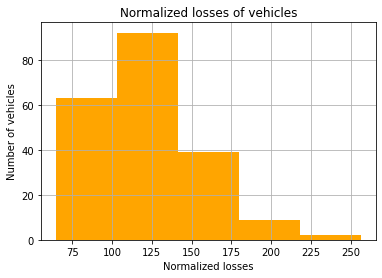

In [91]:
#Normalized losses histogram
autom_data['normalized-losses'].hist(bins=5,color='orange');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses')

Text(0.5, 0, 'Fuel type')

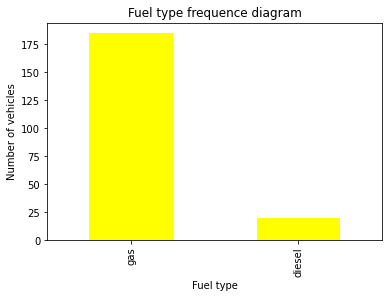

In [90]:
#plotted a bar graph of amount of vehicles vs Fuel type
autom_data['fuel-type'].value_counts().plot(kind='bar',color='yellow')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type')

Text(0.5, 0, 'aspiration type')

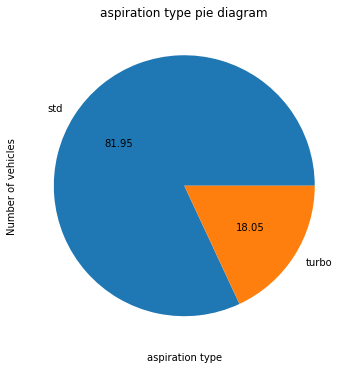

In [131]:
#aspiration type pie diagram
autom_data['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("aspiration type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('aspiration type')

Text(0.5, 0, 'Curb weight')

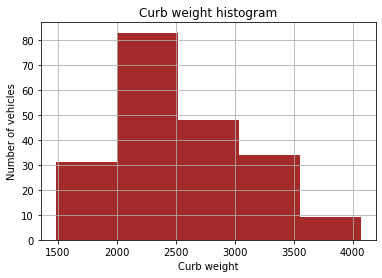

In [88]:
#Curb weight histogram
autom_data['curb-weight'].hist(bins=5,color='brown');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight')

Text(0.5, 0, 'Number of doors')

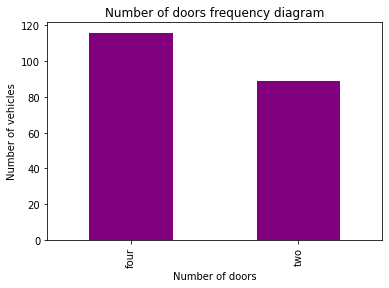

In [87]:
#Number of doors bar chart
autom_data['num-of-doors'].value_counts().plot(kind='bar',color='purple')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors')